In [1]:
import numpy
import scipy.signal
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

We start with a linear model of the system

In [2]:
G = scipy.signal.lti([10], [10, 1])

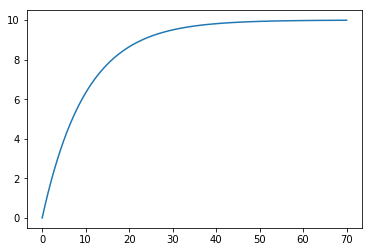

In [3]:
plt.plot(*G.step())

In [4]:
M = 18  # Control horizon
P = 72  # Prediction horizon

In [5]:
DeltaT = 1  # Sampling rate

In [6]:
tcontinuous = numpy.linspace(0, DeltaT*P, 1000)  # some closely spaced time points
tpredict = numpy.arange(0, P*DeltaT, DeltaT)   # discrete points at prediction horizon


In [17]:
u0 = 0 # initial value of MV
y0 = 5 # initial value of CV.
u = u0*numpy.ones(M)  # u is an array of length  M ( control horizon )
r = y0*numpy.ones(P)


In [18]:
x0 = numpy.zeros(G.A.shape[0])
print(x0)

[ 0.]


In [19]:
Q= 1 # CV Weight 
R= 10 # MV Weight 

In [20]:
def extend(u):
    return numpy.concatenate([u, numpy.repeat(u[-1], P-M)])

In [21]:
def prediction(u, t=tpredict, x0=x0):
    t, y, x = scipy.signal.lsim(G, u, t, X0=0, interp=False)
    return y

In [22]:
print(extend(u))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


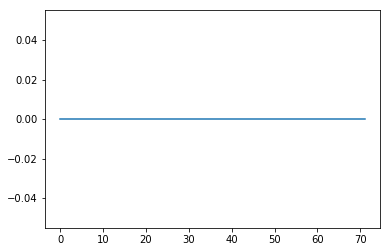

In [23]:
plt.plot(prediction(extend(u)))

In [24]:
def objective(u, x0=x0):
    y = prediction(extend(u))
    return (sum((r - y)**2)+ sum ((numpy.diff(u)**2)*(R**2)))

In [25]:
objective(u)

1800.0

Now we figure out a set of moves which will minimise our objective function

[ 1.38092589  1.31078128  1.20187957  1.07710582  0.95216157  0.83697081
  0.73702975  0.6546147   0.5898051   0.54130917  0.50709958  0.48487856
  0.47239726  0.4676557   0.46900754  0.4751912   0.4853036   0.49872931]


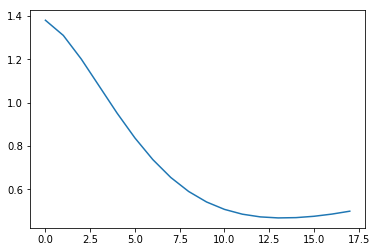

In [26]:
uopt = scipy.optimize.minimize(objective, u).x
print(uopt)
plt.plot(uopt)

Resample the discrete output to continuous time

In [27]:
ucont = extend(uopt)[((tcontinuous-0.01)//DeltaT).astype(int)]


Plot the move plan and the output. Notice that we are getting exactly the output we want at the sampling times.

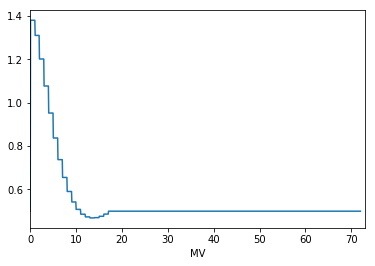

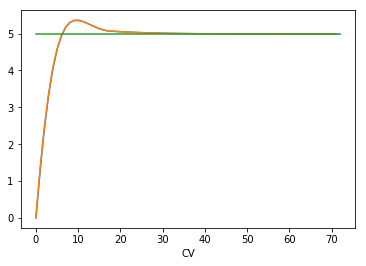

In [28]:
plt.figure()
plt.plot(tcontinuous, ucont)
plt.xlabel("MV")
plt.xlim([0, DeltaT*(P+1)])
plt.figure()
plt.plot(tcontinuous, prediction(ucont, tcontinuous), 
         tpredict, prediction(extend(uopt)),
         tpredict, r,
         )
plt.xlabel("CV")

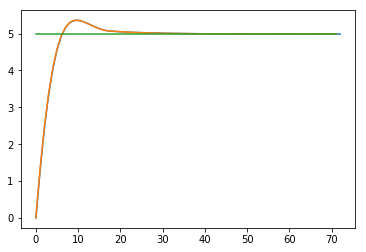

In [29]:
plt.plot(tcontinuous, prediction(ucont, tcontinuous), 
         tpredict, prediction(extend(uopt)),
         tpredict, r,
         )

### things to do
1. develop a steadystate solver that calculates the steady state targets
inputs:
    . model
    . initial conditions of MV 
    . initial conditions of CVs
    . CV targets. 
    . CV priorities. 
    . CV Weights. 
  ouputs
  . CV targets
  . MV Targets
 2. devleop constrained optimizer.  ( max move constraints, vavle position constraints)
 3. estimate state using kalman 
 
 
 Flow chart 
 1. calculate the set of optimal moves 
 2. implement the first move
 3. implement the state estimator 
 4. update the predictions, calculate the new set of moves
 5.